In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
#Load the file into a variable
data = pd.read_csv(r"./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
#Renaming the columns so they follow the PE8 (snake case).
cols = []

for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(" ","_"))
    
data.columns = cols


In [5]:
#1.Get the numerical variables from our dataset.

numerical = data.select_dtypes(include = np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


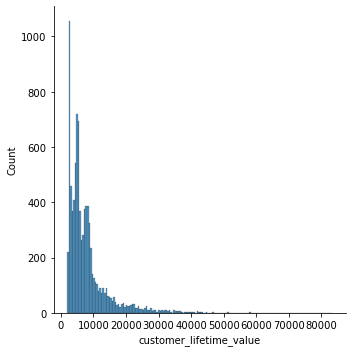

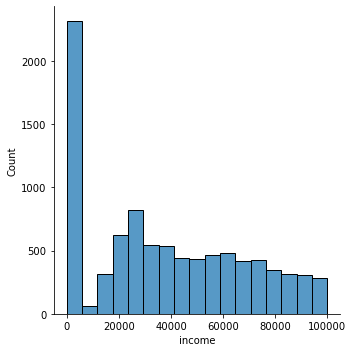

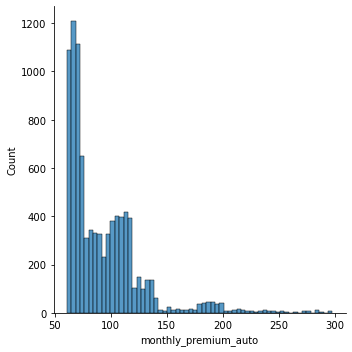

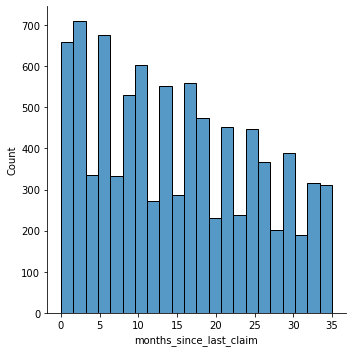

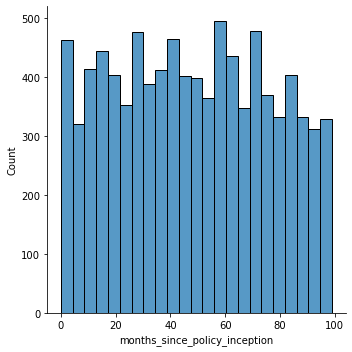

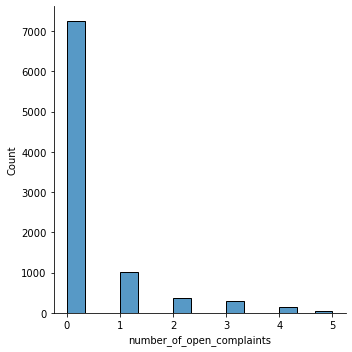

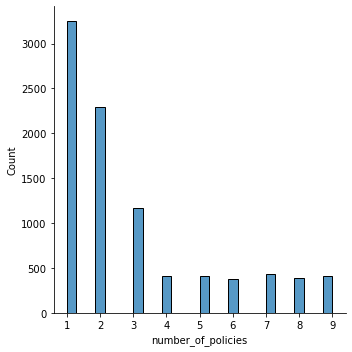

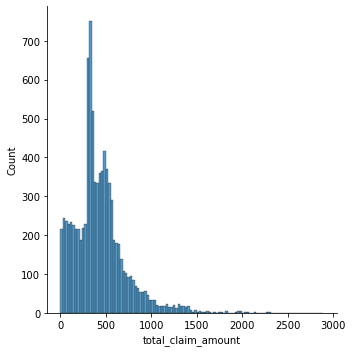

In [6]:
#2.Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

def plot_numerical(x):
    for column in x:
        (sns.displot(x[column]))
        plt.show()
plot_numerical(numerical)

In [7]:
#3.Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

numerical01 = numerical.copy() #for boxcox
numerical02 = numerical.copy() #for minmaxscaler
numerical03 = numerical.copy() #for log-transform
numerical04 = numerical.copy() #for square root transform


In [8]:
#Using BoxCox

def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns #separate into numeric columns
    _ci = {column: None for column in numeric_cols} #it will generate this dictionary
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

numerical01, _ci = boxcox_transform(numerical01)
numerical01

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,33.035752
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,56.357614
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,40.071789
3,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,38.763252
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,19.560154
...,...,...,...,...,...,...,...,...
9129,2.801170,1448.531450,0.685461,7.347815,33.090025,0.648045,0.607328,23.588905
9130,2.711030,697.790558,0.685606,6.134207,13.709541,0.648045,0.000000,32.792951
9131,2.762062,1167.961720,0.685725,4.379465,17.034934,1.176115,0.607328,47.263726
9132,2.758397,704.383672,0.685898,11.319628,1.667871,0.648045,0.893486,44.225147


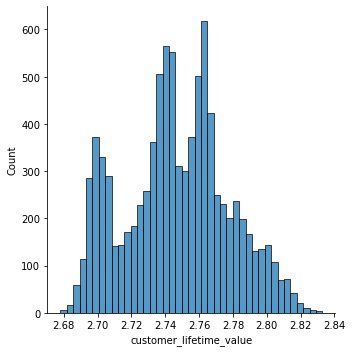

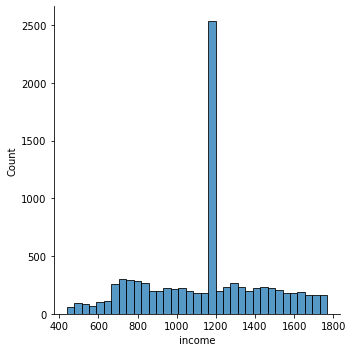

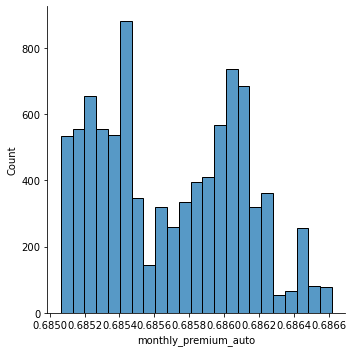

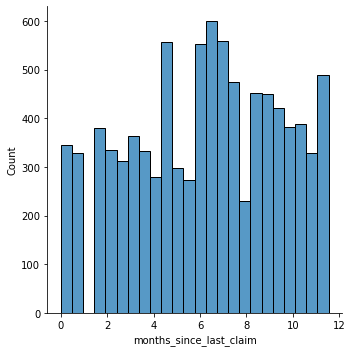

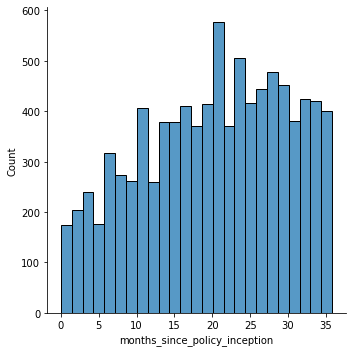

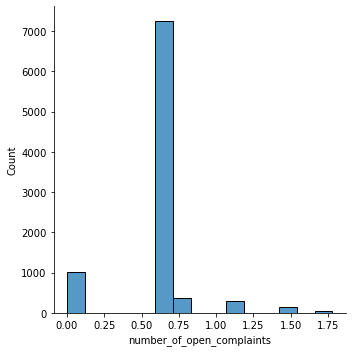

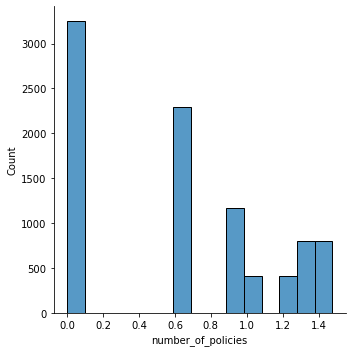

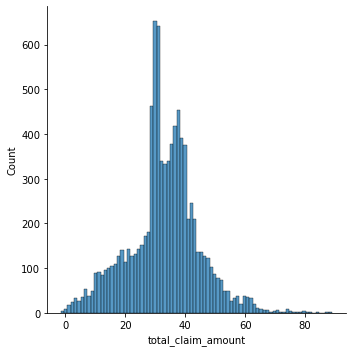

In [9]:
def plot_numerical(x):
    for column in x:
        (sns.displot(x[column]))
        plt.show()
plot_numerical(numerical01)

In [10]:
#trying minmaxScaler
scaler = MinMaxScaler()

numerical02[['customer_lifetime_value', 'income','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies','total_claim_amount','monthly_premium_auto']] = scaler.fit_transform(numerical02[['customer_lifetime_value', 'income','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies','total_claim_amount','monthly_premium_auto']])

numerical02

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710
...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876


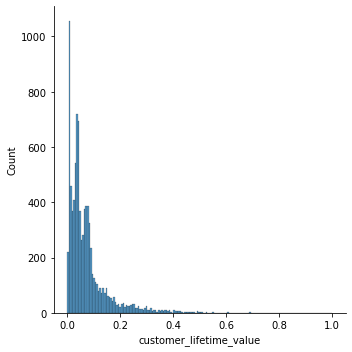

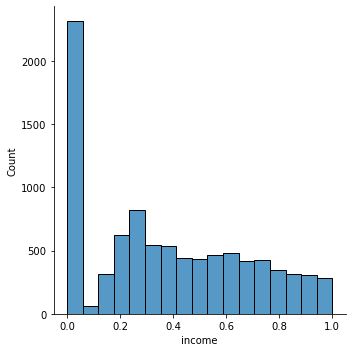

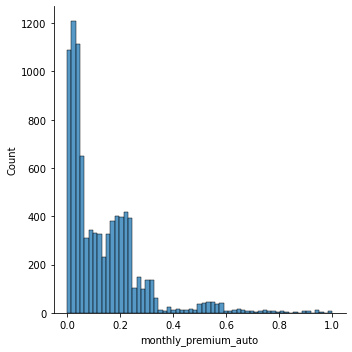

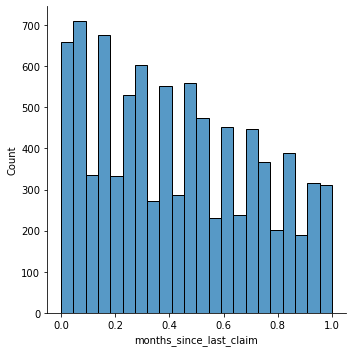

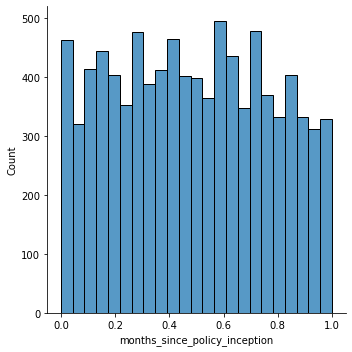

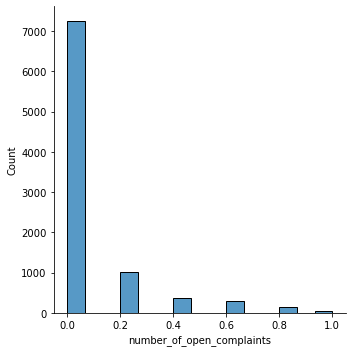

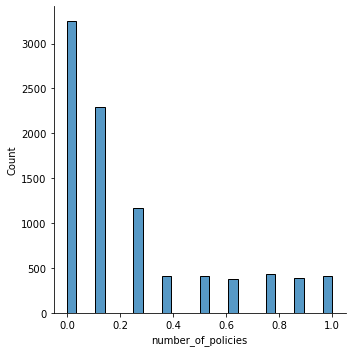

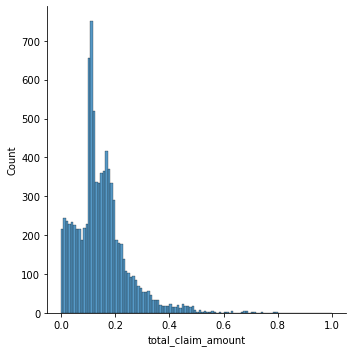

In [11]:
def plot_numerical(x):
    for column in x:
        (sns.displot(x[column]))
        plt.show()
plot_numerical(numerical02)

In [12]:
#Log transform

#create log-transformed data
data_log = np.log(numerical03)
data_log

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,-inf,0.000000,5.952753
1,8.850738,-inf,4.543295,2.564949,3.737670,-inf,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,-inf,0.693147,6.339428
3,8.941920,-inf,4.663439,2.890372,4.174387,-inf,1.945910,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,-inf,0.000000,4.928202
...,...,...,...,...,...,...,...,...
9129,10.060747,11.183602,4.290459,2.890372,4.488636,-inf,0.693147,5.289452
9130,8.038031,9.980634,4.369448,2.639057,3.332205,-inf,0.000000,5.938064
9131,9.007476,-inf,4.442651,2.197225,3.610918,1.098612,0.693147,6.673026
9132,8.925912,9.996112,4.564348,3.526361,1.098612,-inf,1.098612,6.538429


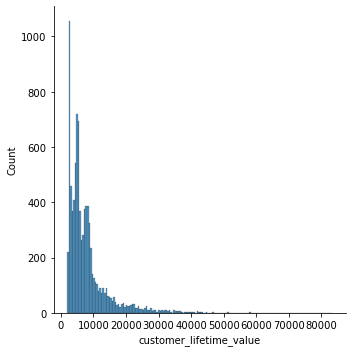

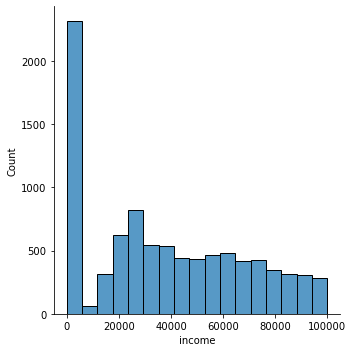

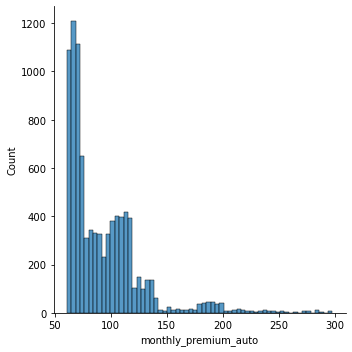

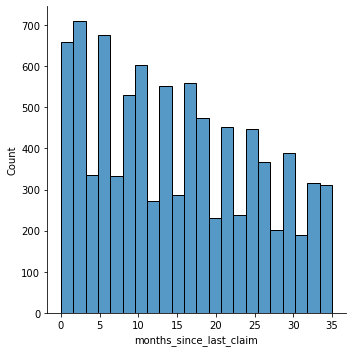

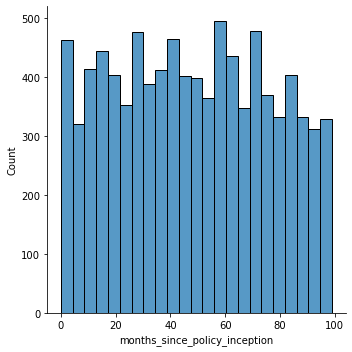

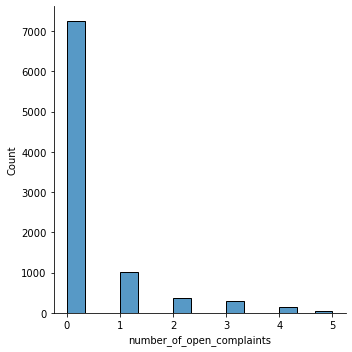

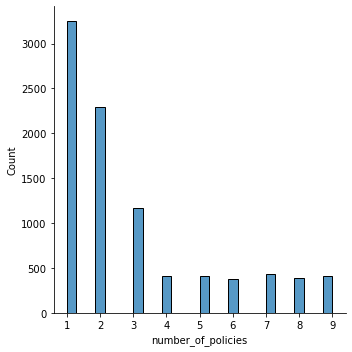

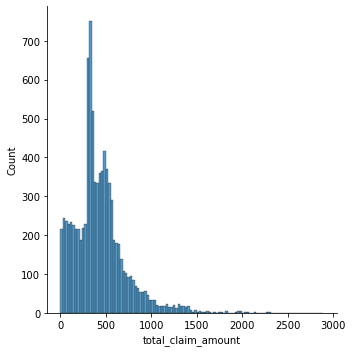

In [13]:
def plot_numerical(x):
    for column in x:
        (sns.displot(x[column]))
        plt.show()
plot_numerical(numerical03)

In [14]:
#Square root transform

numerical04 = np.sqrt(numerical04)
numerical04

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,52.569186,237.221416,8.306624,5.656854,2.236068,0.000000,1.000000,19.616604
1,83.543617,0.000000,9.695360,3.605551,6.480741,0.000000,2.828427,33.637255
2,113.522824,220.832516,10.392305,4.242641,6.164414,0.000000,1.414214,23.800677
3,87.440619,0.000000,10.295630,4.242641,8.062258,0.000000,2.645751,23.019152
4,53.044251,209.370485,8.544004,3.464102,6.633250,0.000000,1.000000,11.752909
...,...,...,...,...,...,...,...,...
9129,152.990156,268.218195,8.544004,4.242641,9.433981,0.000000,1.414214,14.079587
9130,55.646305,146.982992,8.888194,3.741657,5.291503,0.000000,1.000000,19.473058
9131,90.354250,0.000000,9.219544,3.000000,6.082763,1.732051,1.414214,28.120899
9132,86.743544,148.124947,9.797959,5.830952,1.732051,0.000000,1.732051,26.290683


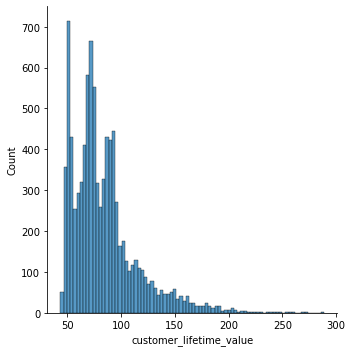

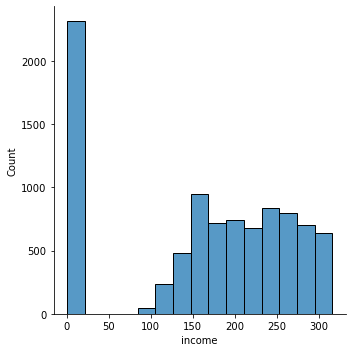

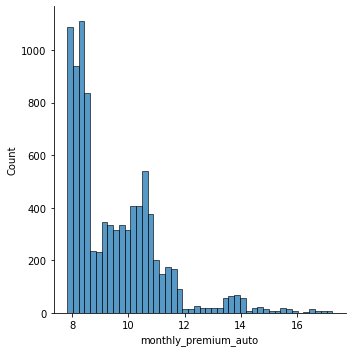

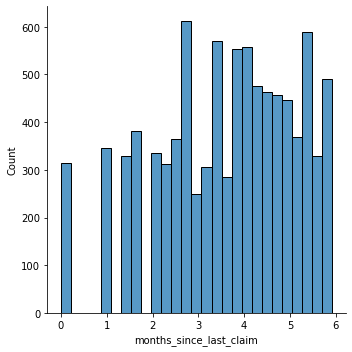

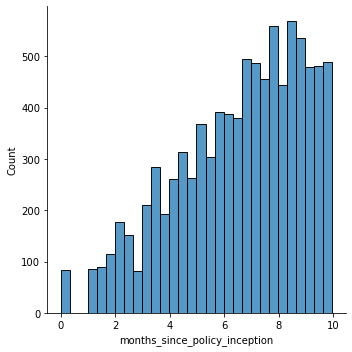

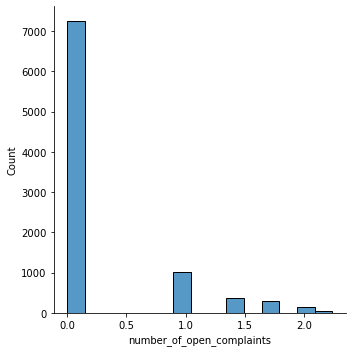

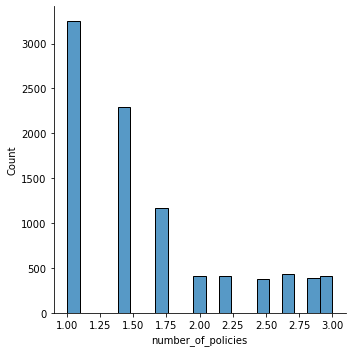

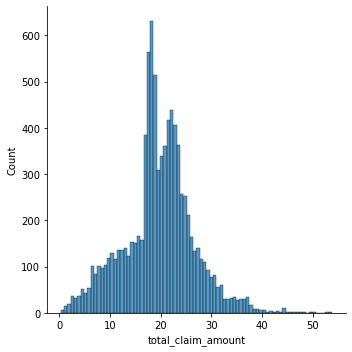

In [15]:
def plot_numerical(x):
    for column in x:
        (sns.displot(x[column]))
        plt.show()
plot_numerical(numerical04)